<a href="https://colab.research.google.com/github/sandje00/nn-image-classification/blob/master/nnmnist_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network for recognizing handwritten digits

source: [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)



In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [0]:
data = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

"Shrinking" the dataset so it is easier to work with (instead of numbers between 0 and 255, decimal numbers between 0 and 1)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

"Flattening the data": extracting the inner units, eg. instead of 28x28 array, an array of size 784

### Defining the model of NN

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),   # input layer; flattening the data
    keras.layers.Dense(512, activation = "relu"),    # hidden layer; fully connected, 512 neurons, activation function is relu
    keras.layers.Dense(256, activation = "relu"),    # hidden layer; fully connected, 256 neurons, activation function is relu
    keras.layers.Dense(128, activation = "relu"),    # hidden layer; fully connected, 128 neurons, activation function is relu
    keras.layers.Dense(10, activation = "softmax")    # output layer; softmax
])

#### ReLU: Rectified Linear Activation Unit

![](https://miro.medium.com/max/2052/0*n_ZGycAljU90iweS.png)


#### Softmax
* pick values for each neuron so they all add up to 1

#### Model parameters

In [0]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### NN training

Epochs - how many times will the NN "see" the images

In [6]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1968 - acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0861 - acc: 0.9738
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0636 - acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0484 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0380 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0329 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0296 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0243 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0236 - acc: 0.9928
Epoch 10/10
60000/60000 [==============================] -

### NN testing

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test accuracy: {}".format(test_accuracy))

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0922 - acc: 0.9796
Test accuracy: 0.9796000123023987


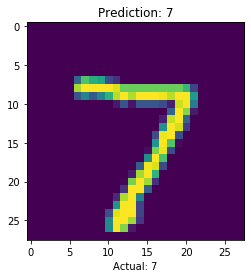

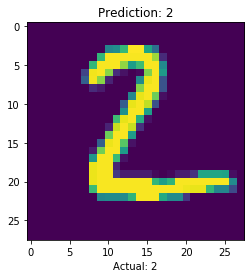

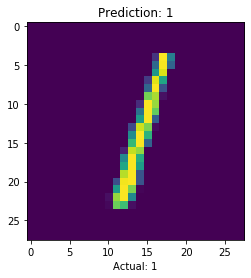

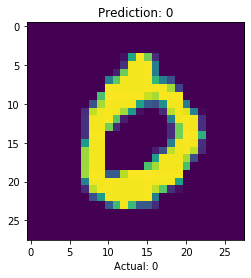

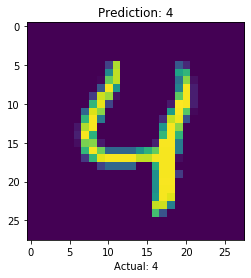

In [8]:
prediction = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel("Actual: {}".format(class_names[test_labels[i]]))
    plt.title("Prediction: {}".format(class_names[np.argmax(prediction[i])]))
    plt.show()